In [1]:
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt
import pandas as pd

In [13]:
#path to the dataset directory
X_path = "C:\\Users\\khede\\OneDrive\\Desktop\\DESKTOP\\Notes Classifier\\NonNotes"
X_path

'C:\\Users\\khede\\OneDrive\\Desktop\\DESKTOP\\Notes Classifier\\NonNotes'

In [14]:
#calculating total number of training examples
X_imgList = os.listdir(X_path)
m = len(X_imgList)     #number of training expamples(m)
m
X_imgList


['A.jpg',
 'B.jpg',
 'C.jpg',
 'D.jpg',
 'E.jpg',
 'F.jpg',
 'G.jpg',
 'H.jpg',
 'I.jpg',
 'J.jpg',
 'K.jpg',
 'L.jpg',
 'M.jpg',
 'N.jpg',
 'O.jpg',
 'P.jpg',
 'Q.jpg',
 'R.jpg',
 'S.jpg',
 'T.jpg',
 'U.jpg',
 'V.jpg',
 'W.jpg',
 'X.jpg',
 'Y.jpg',
 'Z.jpg',
 'ZA.jpg',
 'ZB.jpg',
 'ZC.jpg',
 'ZD.jpg',
 'ZE.jpg',
 'ZF.jpg',
 'ZG.jpg',
 'ZH.jpg',
 'ZI.jpg',
 'ZJ.jpg',
 'ZK.jpg',
 'ZL.jpg',
 'ZM.jpg',
 'ZN.jpg',
 'ZO.jpg',
 'ZP.jpg',
 'ZQ.jpg',
 'ZR.jpg',
 'ZS.jpg',
 'ZT.jpg',
 'ZU.jpg',
 'ZV.jpg',
 'ZW.jpg',
 'ZX.jpg',
 'ZY.jpg',
 'ZZ.jpg',
 'ZZA.jpg',
 'ZZB.jpg',
 'ZZC.jpg',
 'ZZD.jpg',
 'ZZE.jpg',
 'ZZF.jpg',
 'ZZG.jpg',
 'ZZH.jpg',
 'ZZI.jpg',
 'ZZJ.jpg',
 'ZZK.jpg',
 'ZZL.jpg',
 'ZZM.jpg',
 'ZZN.jpg',
 'ZZO.jpg',
 'ZZP.jpg',
 'ZZQ.jpg',
 'ZZR.jpg',
 'ZZS.jpg',
 'ZZT.jpg',
 'ZZU.jpg',
 'ZZV.jpg',
 'ZZW.jpg',
 'ZZX.jpg',
 'ZZY.jpg',
 'ZZZ.jpg',
 'ZZZA.jpg',
 'ZZZB.jpg',
 'ZZZC.jpg',
 'ZZZD.jpg',
 'ZZZE.jpg',
 'ZZZF.jpg',
 'ZZZG.jpg',
 'ZZZH.jpg',
 'ZZZI.jpg',
 'ZZZJ.jpg',
 'ZZZK.jpg',

In [15]:
def load_resize(img):
    global X_path
    print(img)
    raw = cv2.imread(X_path+"\\"+img)
    cvt = cv2.cvtColor(raw,cv2.COLOR_BGR2RGB)
    rimg = cv2.resize(cvt,(64,64))
    return rimg

In [16]:
#using map function to iterate over all the images for resize operation.
X_data = list(map(lambda x:load_resize(x),X_imgList))
#X_data = list(map(lambda x:cv2.resize(cv2.imread(X_path+"\\"+x),(64,64)),X_imgList))

A.jpg
B.jpg
C.jpg
D.jpg
E.jpg
F.jpg
G.jpg
H.jpg
I.jpg
J.jpg
K.jpg
L.jpg
M.jpg
N.jpg
O.jpg
P.jpg
Q.jpg
R.jpg
S.jpg
T.jpg
U.jpg
V.jpg
W.jpg
X.jpg
Y.jpg
Z.jpg
ZA.jpg
ZB.jpg
ZC.jpg
ZD.jpg
ZE.jpg
ZF.jpg
ZG.jpg
ZH.jpg
ZI.jpg
ZJ.jpg
ZK.jpg
ZL.jpg
ZM.jpg
ZN.jpg
ZO.jpg
ZP.jpg
ZQ.jpg
ZR.jpg
ZS.jpg
ZT.jpg
ZU.jpg
ZV.jpg
ZW.jpg
ZX.jpg
ZY.jpg
ZZ.jpg
ZZA.jpg
ZZB.jpg
ZZC.jpg
ZZD.jpg
ZZE.jpg
ZZF.jpg
ZZG.jpg
ZZH.jpg
ZZI.jpg
ZZJ.jpg
ZZK.jpg
ZZL.jpg
ZZM.jpg
ZZN.jpg
ZZO.jpg
ZZP.jpg
ZZQ.jpg
ZZR.jpg
ZZS.jpg
ZZT.jpg
ZZU.jpg
ZZV.jpg
ZZW.jpg
ZZX.jpg
ZZY.jpg
ZZZ.jpg
ZZZA.jpg
ZZZB.jpg
ZZZC.jpg
ZZZD.jpg
ZZZE.jpg
ZZZF.jpg
ZZZG.jpg
ZZZH.jpg
ZZZI.jpg
ZZZJ.jpg
ZZZK.jpg
ZZZL.jpg
ZZZM.jpg
ZZZN.jpg
ZZZO.jpg
ZZZP.jpg
ZZZQ.jpg
ZZZR.jpg
ZZZS.jpg
ZZZT.jpg
ZZZU.jpg
ZZZV.jpg
ZZZW.jpg
ZZZX.jpg
ZZZY.jpg
ZZZZ.jpg
ZZZZA.jpg
ZZZZB.jpg
ZZZZC.jpg
ZZZZD.jpg
ZZZZE.jpg
ZZZZF.jpg
ZZZZG.jpg
ZZZZH.jpg
ZZZZI.jpg
ZZZZJ.jpg
ZZZZK.jpg
ZZZZL.jpg
ZZZZM.jpg
ZZZZN.jpg
ZZZZO.jpg
ZZZZP.jpg
ZZZZQ.jpg
ZZZZR.jpg
ZZZZS.jpg
ZZZZT.jpg
ZZZZU.jpg
ZZZZV.jpg


In [17]:
'''
now we have dataset as,
each row has one image of size 64x64x3
'''
X_data_array =np.array(X_data)
X_data_array.shape

(288, 64, 64, 3)

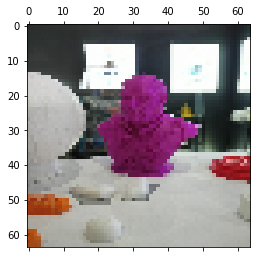

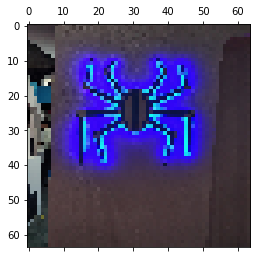

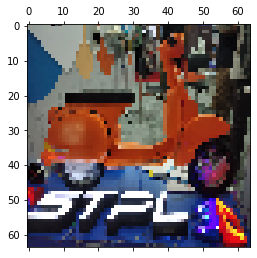

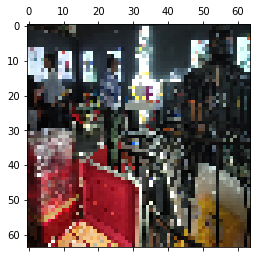

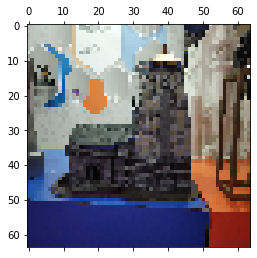

In [19]:
for i in range(100,105):
    plt.matshow(X_data_array[i])

In [20]:
#we have to convert into feature vector where column represents one unrolled image.
'''
 _                                    _
|                                      |                               
|  |       |      |               |    |
|  |       |      |               |    |
| img(0) img(1) img(2) ....... img(m-1)|
|  |       |      |               |    |
|  |       |      |               |    |
|_                                    _|'''

'''shape of X_data_array = (m,64,64,3)
   shape of X_flat = (64*64*3,m)''' 

X_flat = X_data_array.reshape(X_data_array.shape[0],-1).T
X_flat.shape

(12288, 288)

In [21]:
'''Convert numpy array to dataframe to further store into CSV'''
dfX = pd.DataFrame(X_flat)
dfX.head()


,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,69,104,60,145,213,70,133,45,114,108,...,171,175,114,113,68,39,253,194,9,194
1,54,115,63,153,223,50,128,34,103,99,...,170,165,103,107,86,39,239,190,9,190
2,21,109,58,152,224,42,125,40,85,86,...,150,155,99,111,63,37,212,163,9,163
3,68,197,60,64,213,73,152,43,116,113,...,173,182,125,121,34,96,253,195,12,195
4,55,180,62,67,223,60,150,34,103,105,...,170,170,110,112,27,83,239,190,10,189


In [22]:
dfX.to_csv("train_X_NonNotes.csv",index=False)

In [36]:
Y= []
for iname in range(372):
    Y.append(1)
Y = np.array([Y])
Y.shape

(1, 372)

In [37]:
dfY = pd.DataFrame(Y)
dfY.head()

,0,1,2,3,4,5,6,7,8,9,...,362,363,364,365,366,367,368,369,370,371
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [38]:
dfY.to_csv("train_Y_Notes.csv",index=False)

In [41]:
notesX = pd.read_csv("train_X_Notes.csv")
NonnotesX = pd.read_csv("train_X_NonNotes.csv")

In [42]:
notesX.head()

,0,1,2,3,4,5,6,7,8,9,...,362,363,364,365,366,367,368,369,370,371
0,10,50,245,2,0,0,21,255,15,119,...,255,255,255,131,223,80,7,0,51,255
1,8,36,245,2,0,0,45,255,15,118,...,255,255,255,144,231,83,10,0,37,255
2,11,25,245,2,0,0,66,255,17,114,...,255,255,255,147,244,98,15,0,28,255
3,8,56,245,2,0,0,118,255,15,117,...,255,255,255,134,217,112,7,0,50,255
4,7,38,245,2,0,0,181,255,13,117,...,255,255,255,141,225,112,11,0,36,255


In [43]:
NonnotesX.head()

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,69,104,60,145,213,70,133,45,114,108,...,171,175,114,113,68,39,253,194,9,194
1,54,115,63,153,223,50,128,34,103,99,...,170,165,103,107,86,39,239,190,9,190
2,21,109,58,152,224,42,125,40,85,86,...,150,155,99,111,63,37,212,163,9,163
3,68,197,60,64,213,73,152,43,116,113,...,173,182,125,121,34,96,253,195,12,195
4,55,180,62,67,223,60,150,34,103,105,...,170,170,110,112,27,83,239,190,10,189


In [44]:
'''concat two dataframes of notes and non notes into one dataframe for X input of neural net'''
outputX = pd.concat([notesX,NonnotesX],axis='columns')


,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,10,50,245,2,0,0,21,255,15,119,...,171,175,114,113,68,39,253,194,9,194
1,8,36,245,2,0,0,45,255,15,118,...,170,165,103,107,86,39,239,190,9,190
2,11,25,245,2,0,0,66,255,17,114,...,150,155,99,111,63,37,212,163,9,163
3,8,56,245,2,0,0,118,255,15,117,...,173,182,125,121,34,96,253,195,12,195
4,7,38,245,2,0,0,181,255,13,117,...,170,170,110,112,27,83,239,190,10,189


In [47]:
outputX.to_csv("Total_input_data(X).csv",index=False)

In [48]:
notesY = pd.read_csv("train_Y_Notes.csv")
NonnotesY = pd.read_csv("train_Y_NonNotes.csv")

In [49]:
notesY.head()

,0,1,2,3,4,5,6,7,8,9,...,362,363,364,365,366,367,368,369,370,371
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [50]:
NonnotesY.head()

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
'''concat two dataframes of notes and non notes into one dataframe for Y output of neural net'''
outputY = pd.concat([notesY,NonnotesY], axis='columns')

In [52]:
outputY.to_csv("Total_output_data(Y).csv",index=False)

In [53]:
df = pd.read_csv("Total_output_data(Y).csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,278.1,279.1,280.1,281.1,282.1,283.1,284.1,285.1,286.1,287.1
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
